In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


df = pd.read_csv('Position_Salaries.csv')
# print("data=\n",df)

df = shuffle(df).reset_index(drop=True)
# print("Shuffled data =\n",df)


X = df.iloc[:,1:2].values # make X data into matrix/array
# print("X=\n",X)

y = df.iloc[:,2:3].values # make y data into matrix/array
# print("y=\n",y)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print("StandarScaled X = \n",X)
print("StandarScaled y = \n",y)




StandarScaled X = 
 [[ 0.52223297]
 [ 0.17407766]
 [-1.21854359]
 [-0.87038828]
 [ 1.21854359]
 [-1.5666989 ]
 [-0.52223297]
 [-0.17407766]
 [ 1.5666989 ]
 [ 0.87038828]]
StandarScaled y = 
 [[-0.17428902]
 [-0.35033854]
 [-0.70243757]
 [-0.66722767]
 [ 0.88200808]
 [-0.72004253]
 [-0.59680786]
 [-0.49117815]
 [ 2.64250325]
 [ 0.17781001]]


/home/shangeth/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X,y)

/home/shangeth/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

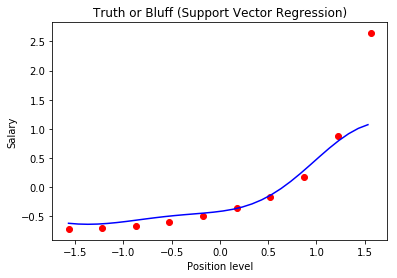

In [37]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()